In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from keras import backend as K
import tensorflow as tf
import pickle
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard
import random

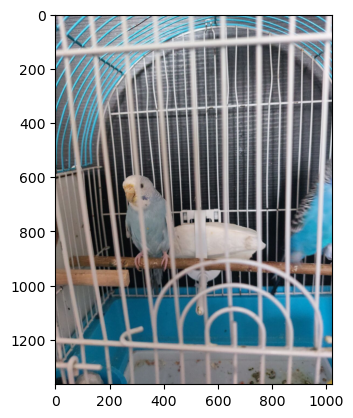

[[[114 113 118]
  [118 117 122]
  [127 126 132]
  ...
  [183 198 205]
  [165 185 192]
  [149 174 179]]

 [[122 121 126]
  [125 124 129]
  [132 131 137]
  ...
  [180 194 203]
  [164 184 191]
  [151 176 181]]

 [[128 127 132]
  [131 130 135]
  [135 134 140]
  ...
  [177 194 202]
  [160 185 190]
  [150 178 182]]

 ...

 [[ 14  19  22]
  [ 11  16  19]
  [  9  14  17]
  ...
  [193 156  49]
  [193 157  47]
  [193 157  47]]

 [[ 14  19  22]
  [ 11  16  19]
  [  8  13  16]
  ...
  [195 158  51]
  [195 159  49]
  [194 158  48]]

 [[ 11  16  19]
  [ 10  15  18]
  [  7  12  15]
  ...
  [196 159  52]
  [196 160  50]
  [195 159  49]]]
(1365, 1024, 3)


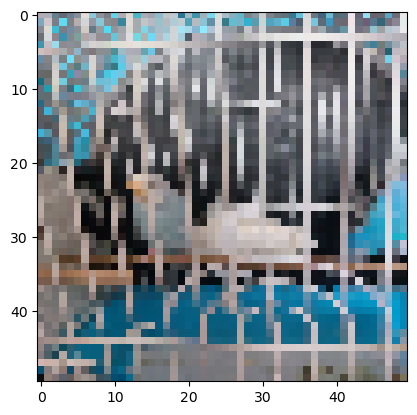

100%|██████████| 150/150 [00:05<00:00, 28.24it/s]


450
2
0
0
1
0
0
0
0
2
1
[[[[246 246 236]
   [255 254 252]
   [253 242 231]
   ...
   [232 214 160]
   [208 190 114]
   [228 181 121]]

  [[255 255 251]
   [242 234 197]
   [201 198 152]
   ...
   [244 233 204]
   [219 175 125]
   [225 180 137]]

  [[122 109  80]
   [137 125  93]
   [146 129 102]
   ...
   [228 213 186]
   [255 252 236]
   [253 247 233]]

  ...

  [[222 205 187]
   [209 192 174]
   [204 189 168]
   ...
   [ 91 100 115]
   [ 94 101 117]
   [103 109 123]]

  [[216 199 179]
   [188 171 151]
   [169 153 135]
   ...
   [105 109 121]
   [ 85  91 105]
   [ 90  96 110]]

  [[191 174 154]
   [181 163 149]
   [148 138 128]
   ...
   [ 94  98 109]
   [ 99 103 114]
   [ 95  99 108]]]]


In [2]:
DATADIR = "C:\\Users\\ferid\\Desktop\\train"

CATEGORIES = ["birds", "cats", "dogs"]

img_width, img_height = 224, 224

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img))  
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)  
        plt.show()  

        break 
    break  

print(img_array)

print(img_array.shape)

IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img))  

                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
            

create_training_data()

print(len(training_data))



random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])



X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)
y = tf.keras.utils.to_categorical(y, num_classes=3)




pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()



In [3]:


NAME = "Birds-vs-cats-vs-dogs-CNN"
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))


model.add(Dense(3))
model.add(Activation('softmax'))





model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=5, validation_split=0.3,callbacks=[tensorboard])


model.save('CNN-64x2-1.model')

Epoch 1/5
10/10 [==============================] - 2s 142ms/step - loss: 1.1217 - accuracy: 0.3333 - val_loss: 1.0910 - val_accuracy: 0.3481
Epoch 2/5
10/10 [==============================] - 1s 100ms/step - loss: 1.0946 - accuracy: 0.3619 - val_loss: 1.0822 - val_accuracy: 0.3481
Epoch 3/5
10/10 [==============================] - 1s 109ms/step - loss: 1.0701 - accuracy: 0.4476 - val_loss: 1.0554 - val_accuracy: 0.4296
Epoch 4/5
10/10 [==============================] - 1s 110ms/step - loss: 1.0284 - accuracy: 0.4762 - val_loss: 1.1016 - val_accuracy: 0.4148
Epoch 5/5
10/10 [==============================] - 1s 102ms/step - loss: 0.9827 - accuracy: 0.5302 - val_loss: 1.1258 - val_accuracy: 0.3926


INFO:tensorflow:Assets written to: CNN-64x2-1.model\assets


INFO:tensorflow:Assets written to: CNN-64x2-1.model\assets


In [6]:
model = tf.keras.models.load_model("CNN-64x2-1.model")

DATADIR = 'C:\\Users\\ferid\\Desktop\\cats'
DATADIR2 = 'C:\\Users\\ferid\\Desktop\\dogs'
DATADIR3 = 'C:\\Users\\ferid\\Desktop\\birds'

CATEGORIES = ["birds","cats", "dogs"]  
paths = ["birds","cats","dogs"]



def prepare(filepath):
    IMG_SIZE = 50  
    img_array = cv2.imread(filepath)  
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
    new_array = cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB)
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  


def prepare3(overall,DATADIR):
    for img in tqdm(os.listdir(DATADIR)):
        try:
            
            img_array = cv2.imread(os.path.join(DATADIR, img))
            new_array = cv2.resize(img_array, (50, 50))
            new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
            new_array = new_array.reshape(-1, 50, 50, 3)
            prediction2 = model.predict([new_array])
            score = tf.nn.softmax(prediction2[0])
            
            if(CATEGORIES[np.argmax(score)]=='cats'):
                overall+=1
            print(
                "This image most likely belongs to {} ."
                .format(CATEGORIES[np.argmax(score)])
            )
            print(overall)
        except Exception as e:
            pass




prepare3(0,DATADIR)
prepare3(0,DATADIR2)
prepare3(0,DATADIR3)


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 [==============================] - 0s 247ms/step


  2%|▏         | 1/50 [00:00<00:21,  2.27it/s]

This image most likely belongs to cats .
1
1/1 [==============================] - 0s 29ms/step


  4%|▍         | 2/50 [00:00<00:13,  3.49it/s]

This image most likely belongs to birds .
1
1/1 [==============================] - 0s 24ms/step


  6%|▌         | 3/50 [00:00<00:10,  4.34it/s]

This image most likely belongs to cats .
2
1/1 [==============================] - 0s 25ms/step


  8%|▊         | 4/50 [00:00<00:09,  4.83it/s]

This image most likely belongs to cats .
3
1/1 [==============================] - 0s 22ms/step


 10%|█         | 5/50 [00:01<00:08,  5.16it/s]

This image most likely belongs to cats .
4
1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 6/50 [00:01<00:07,  5.77it/s]

This image most likely belongs to cats .
5
1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 7/50 [00:01<00:07,  6.06it/s]

This image most likely belongs to cats .
6
1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 8/50 [00:01<00:07,  5.92it/s]

This image most likely belongs to cats .
7
1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 9/50 [00:01<00:07,  5.79it/s]

This image most likely belongs to cats .
8
1/1 [==============================] - 0s 23ms/step


 20%|██        | 10/50 [00:01<00:07,  5.67it/s]

This image most likely belongs to cats .
9
1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 11/50 [00:02<00:07,  5.50it/s]

This image most likely belongs to birds .
9
1/1 [==============================] - 0s 25ms/step
This image most likely belongs to birds .
9


 24%|██▍       | 12/50 [00:02<00:06,  5.50it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 13/50 [00:02<00:06,  5.69it/s]

This image most likely belongs to birds .
9
1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 14/50 [00:02<00:06,  5.97it/s]

This image most likely belongs to cats .
10
1/1 [==============================] - 0s 24ms/step


 30%|███       | 15/50 [00:02<00:06,  5.72it/s]

This image most likely belongs to cats .
11
1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 16/50 [00:02<00:05,  6.16it/s]

This image most likely belongs to cats .
12
1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 17/50 [00:03<00:05,  6.25it/s]

This image most likely belongs to cats .
13
1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 18/50 [00:03<00:04,  6.50it/s]

This image most likely belongs to cats .
14
1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 19/50 [00:03<00:04,  6.63it/s]

This image most likely belongs to cats .
15
1/1 [==============================] - 0s 24ms/step


 40%|████      | 20/50 [00:03<00:04,  6.59it/s]

This image most likely belongs to cats .
16
1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 21/50 [00:03<00:04,  6.88it/s]

This image most likely belongs to cats .
17
1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 22/50 [00:03<00:03,  7.02it/s]

This image most likely belongs to cats .
18
1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 23/50 [00:03<00:03,  7.40it/s]

This image most likely belongs to cats .
19
1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 24/50 [00:04<00:03,  7.47it/s]

This image most likely belongs to cats .
20
1/1 [==============================] - 0s 24ms/step


 50%|█████     | 25/50 [00:04<00:03,  7.82it/s]

This image most likely belongs to cats .
21
1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 26/50 [00:04<00:03,  7.69it/s]

This image most likely belongs to birds .
21
1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 27/50 [00:04<00:02,  7.72it/s]

This image most likely belongs to cats .
22
1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 28/50 [00:04<00:02,  8.05it/s]

This image most likely belongs to cats .
23
1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 29/50 [00:04<00:02,  8.15it/s]

This image most likely belongs to cats .
24
1/1 [==============================] - 0s 24ms/step


 60%|██████    | 30/50 [00:04<00:02,  7.40it/s]

This image most likely belongs to cats .
25
1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 31/50 [00:05<00:02,  6.84it/s]

This image most likely belongs to dogs .
25
1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 32/50 [00:05<00:02,  6.50it/s]

This image most likely belongs to cats .
26
1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 33/50 [00:05<00:02,  6.94it/s]

This image most likely belongs to dogs .
26
1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 34/50 [00:05<00:02,  6.48it/s]

This image most likely belongs to cats .
27
1/1 [==============================] - 0s 23ms/step


 70%|███████   | 35/50 [00:05<00:02,  6.34it/s]

This image most likely belongs to cats .
28
1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 36/50 [00:05<00:02,  6.20it/s]

This image most likely belongs to birds .
28
1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 37/50 [00:05<00:02,  6.01it/s]

This image most likely belongs to birds .
28
1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 38/50 [00:06<00:02,  5.94it/s]

This image most likely belongs to cats .
29
1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 39/50 [00:06<00:01,  6.02it/s]

This image most likely belongs to birds .
29
1/1 [==============================] - 0s 24ms/step


 80%|████████  | 40/50 [00:06<00:01,  6.20it/s]

This image most likely belongs to cats .
30
1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 41/50 [00:06<00:01,  6.21it/s]

This image most likely belongs to cats .
31
1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 42/50 [00:06<00:01,  6.49it/s]

This image most likely belongs to cats .
32
1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 43/50 [00:06<00:01,  6.63it/s]

This image most likely belongs to cats .
33
1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 44/50 [00:07<00:00,  6.78it/s]

This image most likely belongs to cats .
34
1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 45/50 [00:07<00:00,  6.68it/s]

This image most likely belongs to cats .
35
1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 46/50 [00:07<00:00,  6.86it/s]

This image most likely belongs to cats .
36
1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 47/50 [00:07<00:00,  7.06it/s]

This image most likely belongs to cats .
37
1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 48/50 [00:07<00:00,  7.34it/s]

This image most likely belongs to cats .
38
1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 49/50 [00:07<00:00,  7.34it/s]

This image most likely belongs to cats .
39
1/1 [==============================] - 0s 24ms/step


100%|██████████| 50/50 [00:07<00:00,  6.34it/s]


This image most likely belongs to cats .
40


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 1/50 [00:00<00:06,  7.69it/s]

This image most likely belongs to birds .
0
1/1 [==============================] - 0s 25ms/step


  4%|▍         | 2/50 [00:00<00:06,  7.94it/s]

This image most likely belongs to cats .
1
1/1 [==============================] - 0s 26ms/step


  6%|▌         | 3/50 [00:00<00:05,  7.87it/s]

This image most likely belongs to cats .
2
1/1 [==============================] - 0s 25ms/step


  8%|▊         | 4/50 [00:00<00:06,  7.42it/s]

This image most likely belongs to cats .
3
1/1 [==============================] - 0s 23ms/step


 10%|█         | 5/50 [00:00<00:07,  5.82it/s]

This image most likely belongs to cats .
4
1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 6/50 [00:00<00:06,  6.45it/s]

This image most likely belongs to cats .
5
1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 7/50 [00:01<00:06,  6.89it/s]

This image most likely belongs to cats .
6
1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 8/50 [00:01<00:06,  6.98it/s]

This image most likely belongs to birds .
6
1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 9/50 [00:01<00:05,  7.39it/s]

This image most likely belongs to birds .
6
1/1 [==============================] - 0s 26ms/step


 20%|██        | 10/50 [00:01<00:05,  7.73it/s]

This image most likely belongs to cats .
7
1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 11/50 [00:01<00:04,  7.98it/s]

This image most likely belongs to cats .
8
1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 12/50 [00:01<00:04,  8.27it/s]

This image most likely belongs to cats .
9
1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 13/50 [00:01<00:04,  8.27it/s]

This image most likely belongs to cats .
10
1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 14/50 [00:01<00:04,  8.70it/s]

This image most likely belongs to birds .
10
1/1 [==============================] - 0s 25ms/step


 30%|███       | 15/50 [00:01<00:04,  8.45it/s]

This image most likely belongs to cats .
11
1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 16/50 [00:02<00:04,  7.89it/s]

This image most likely belongs to dogs .
11
1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 17/50 [00:02<00:04,  7.47it/s]

This image most likely belongs to cats .
12
1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 18/50 [00:02<00:04,  7.18it/s]

This image most likely belongs to dogs .
12
1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 19/50 [00:02<00:04,  7.00it/s]

This image most likely belongs to cats .
13
1/1 [==============================] - 0s 30ms/step


 40%|████      | 20/50 [00:02<00:04,  6.84it/s]

This image most likely belongs to cats .
14
1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 21/50 [00:02<00:04,  6.87it/s]

This image most likely belongs to cats .
15
1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 22/50 [00:02<00:03,  7.11it/s]

This image most likely belongs to cats .
16
1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 23/50 [00:03<00:03,  6.84it/s]

This image most likely belongs to birds .
16
1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 24/50 [00:03<00:03,  7.00it/s]

This image most likely belongs to cats .
17
1/1 [==============================] - 0s 32ms/step


 50%|█████     | 25/50 [00:03<00:03,  7.07it/s]

This image most likely belongs to dogs .
17
1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 26/50 [00:03<00:03,  6.78it/s]

This image most likely belongs to cats .
18
1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 27/50 [00:03<00:03,  7.19it/s]

This image most likely belongs to cats .
19
1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 28/50 [00:03<00:02,  7.43it/s]

This image most likely belongs to cats .
20
1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 29/50 [00:03<00:02,  7.39it/s]

This image most likely belongs to cats .
21
1/1 [==============================] - 0s 25ms/step


 60%|██████    | 30/50 [00:04<00:02,  7.83it/s]

This image most likely belongs to cats .
22
1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 31/50 [00:04<00:02,  7.36it/s]

This image most likely belongs to birds .
22
1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 32/50 [00:04<00:02,  7.08it/s]

This image most likely belongs to cats .
23
1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 33/50 [00:04<00:03,  4.69it/s]

This image most likely belongs to dogs .
23
1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 34/50 [00:04<00:02,  5.49it/s]

This image most likely belongs to cats .
24
1/1 [==============================] - 0s 25ms/step


 70%|███████   | 35/50 [00:04<00:02,  6.29it/s]

This image most likely belongs to cats .
25
1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 36/50 [00:05<00:02,  6.37it/s]

This image most likely belongs to cats .
26
1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 37/50 [00:05<00:01,  6.64it/s]

This image most likely belongs to cats .
27
1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 38/50 [00:05<00:01,  6.12it/s]

This image most likely belongs to cats .
28
1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 39/50 [00:05<00:02,  5.39it/s]

This image most likely belongs to cats .
29
1/1 [==============================] - 0s 23ms/step


 80%|████████  | 40/50 [00:05<00:01,  6.12it/s]

This image most likely belongs to cats .
30
1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 41/50 [00:05<00:01,  6.37it/s]

This image most likely belongs to cats .
31
1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 42/50 [00:06<00:01,  6.57it/s]

This image most likely belongs to cats .
32
1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 43/50 [00:06<00:01,  6.04it/s]

This image most likely belongs to cats .
33
1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 44/50 [00:06<00:01,  5.79it/s]

This image most likely belongs to dogs .
33
1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 45/50 [00:06<00:00,  5.75it/s]

This image most likely belongs to birds .
33
1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 46/50 [00:06<00:00,  5.83it/s]

This image most likely belongs to cats .
34
1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 47/50 [00:06<00:00,  6.27it/s]

This image most likely belongs to cats .
35
1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 48/50 [00:07<00:00,  6.32it/s]

This image most likely belongs to birds .
35
1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 49/50 [00:07<00:00,  6.75it/s]

This image most likely belongs to cats .
36
1/1 [==============================] - 0s 24ms/step


100%|██████████| 50/50 [00:07<00:00,  6.77it/s]


This image most likely belongs to cats .
37


  0%|          | 0/43 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 1/43 [00:00<00:05,  7.81it/s]

This image most likely belongs to cats .
1
1/1 [==============================] - 0s 26ms/step


  5%|▍         | 2/43 [00:00<00:05,  8.11it/s]

This image most likely belongs to cats .
2
1/1 [==============================] - 0s 27ms/step


  7%|▋         | 3/43 [00:00<00:05,  7.88it/s]

This image most likely belongs to birds .
2
1/1 [==============================] - 0s 26ms/step


  9%|▉         | 4/43 [00:00<00:04,  8.21it/s]

This image most likely belongs to cats .
3
1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 5/43 [00:00<00:04,  8.09it/s]

This image most likely belongs to cats .
4
1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 6/43 [00:00<00:04,  7.78it/s]

This image most likely belongs to cats .
5
1/1 [==============================] - 0s 24ms/step


 16%|█▋        | 7/43 [00:00<00:04,  7.83it/s]

This image most likely belongs to cats .
6
1/1 [==============================] - 0s 27ms/step


 19%|█▊        | 8/43 [00:01<00:04,  7.40it/s]

This image most likely belongs to birds .
6
1/1 [==============================] - 0s 25ms/step


 21%|██        | 9/43 [00:01<00:04,  7.47it/s]

This image most likely belongs to birds .
6
1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 10/43 [00:01<00:04,  7.58it/s]

This image most likely belongs to birds .
6
1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 11/43 [00:01<00:04,  7.74it/s]

This image most likely belongs to cats .
7
1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 12/43 [00:01<00:04,  7.69it/s]

This image most likely belongs to birds .
7
1/1 [==============================] - 0s 24ms/step


 30%|███       | 13/43 [00:01<00:03,  7.69it/s]

This image most likely belongs to birds .
7
1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 14/43 [00:01<00:03,  8.01it/s]

This image most likely belongs to birds .
7
1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 15/43 [00:01<00:03,  7.53it/s]

This image most likely belongs to cats .
8
1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 16/43 [00:02<00:03,  7.60it/s]

This image most likely belongs to cats .
9
1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 17/43 [00:02<00:03,  7.55it/s]

This image most likely belongs to dogs .
9
1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 18/43 [00:02<00:03,  7.65it/s]

This image most likely belongs to cats .
10
1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 19/43 [00:02<00:03,  7.70it/s]

This image most likely belongs to birds .
10
1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 20/43 [00:02<00:02,  7.91it/s]

This image most likely belongs to cats .
11
1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 21/43 [00:02<00:02,  7.96it/s]

This image most likely belongs to birds .
11
1/1 [==============================] - 0s 27ms/step


 51%|█████     | 22/43 [00:02<00:02,  8.09it/s]

This image most likely belongs to birds .
11
1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 23/43 [00:02<00:02,  8.34it/s]

This image most likely belongs to cats .
12
1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 24/43 [00:03<00:02,  8.08it/s]

This image most likely belongs to birds .
12
1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 25/43 [00:03<00:02,  6.25it/s]

This image most likely belongs to cats .
13
1/1 [==============================] - 0s 25ms/step


 60%|██████    | 26/43 [00:03<00:02,  6.65it/s]

This image most likely belongs to cats .
14
1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 27/43 [00:03<00:02,  7.16it/s]

This image most likely belongs to dogs .
14
1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 28/43 [00:03<00:01,  7.61it/s]

This image most likely belongs to birds .
14
1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 29/43 [00:03<00:01,  7.78it/s]

This image most likely belongs to cats .
15
1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 30/43 [00:03<00:01,  7.90it/s]

This image most likely belongs to cats .
16
1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 31/43 [00:04<00:01,  7.96it/s]

This image most likely belongs to cats .
17
1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 32/43 [00:04<00:01,  7.94it/s]

This image most likely belongs to birds .
17
1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 33/43 [00:04<00:01,  8.13it/s]

This image most likely belongs to cats .
18
1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 34/43 [00:04<00:01,  8.05it/s]

This image most likely belongs to birds .
18
1/1 [==============================] - 0s 24ms/step


 81%|████████▏ | 35/43 [00:04<00:01,  7.88it/s]

This image most likely belongs to cats .
19
1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 36/43 [00:04<00:00,  7.92it/s]

This image most likely belongs to cats .
20
1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 37/43 [00:04<00:00,  8.08it/s]

This image most likely belongs to birds .
20
1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 38/43 [00:04<00:00,  7.86it/s]

This image most likely belongs to cats .
21
1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 39/43 [00:05<00:00,  7.88it/s]

This image most likely belongs to birds .
21
1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 40/43 [00:05<00:00,  8.01it/s]

This image most likely belongs to cats .
22
1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 41/43 [00:05<00:00,  8.13it/s]

This image most likely belongs to cats .
23
1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 42/43 [00:05<00:00,  8.25it/s]

This image most likely belongs to birds .
23
1/1 [==============================] - 0s 26ms/step


100%|██████████| 43/43 [00:05<00:00,  7.78it/s]

This image most likely belongs to cats .
24
